# Parte 1

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sympy import *
from scipy import *
init_printing(use_unicode=True)

x, y = symbols('x y') #define x e y como variáveis simbólicas.
def f(x,y): return (4-2.1*(x**2) + (1/3)*(x**4))*(x**2) + x*y -4*(1-(y**2))*(y**2)
f(x,y)

## Plotando o gráfico de $f(x)$
$f(x) = (4−2.1x_{1}^2+\frac{1}{3}x_{1}^4)x_{1}^2 + x_{1}x_{2} −4(1−x_{2}^2)x_{2}^2$

<IPython.core.display.Javascript object>


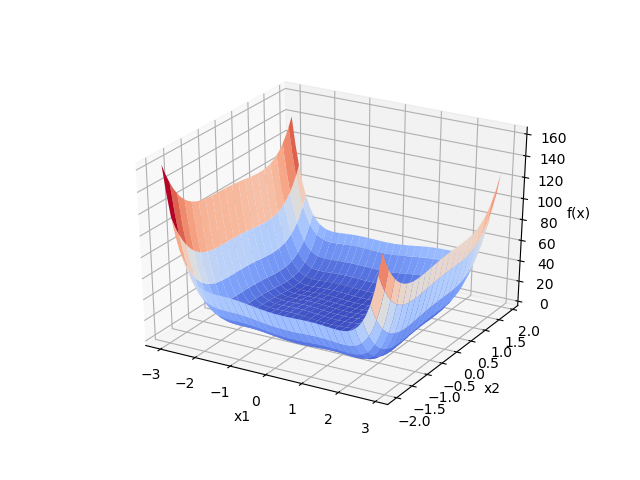

In [15]:
X = np.arange(-3, 3, 0.1)
Y = np.arange(-2, 2, 0.1)

X, Y = meshgrid(X,Y)
Z = f(X,Y)
# x = X.flatten()
# y = Y.flatten()

fig = plt.figure();
ax = fig.gca(projection='3d');
ax.plot_surface(X, Y, Z, rstride=2, cstride=2, cmap=mpl.cm.coolwarm,
               linewidth=1, antialiased=True)
ax.set_xlabel('x1');
ax.set_ylabel('x2');
ax.set_zlabel('f(x)');

## Análise do gráfico
Como mostrado na figura a cima o gráfico da função $f(x) = (4−2.1x_{1}^2+\frac{1}{3}x_{1}^4)x_{1}^2 + x_{1}x_{2} −4(1−x_{2}^2)x_{2}^2$  cresce rapidamente quando $x_{1} > 2.5$ ou $x_{1} < -2.5$ e
quando $x_{2} > 1.5$ ou $x_{2} < -1.5$.

Para analizar melhor iremos nos concentrar no centro da função. Vamos plotar o gráfico no intervalo $x_{1} \in \{-2, 2\}$ e $x_{2} \in \{-1.25, 1.25\}$ para melhor visualizar as características da função nesse intervalo.

<IPython.core.display.Javascript object>


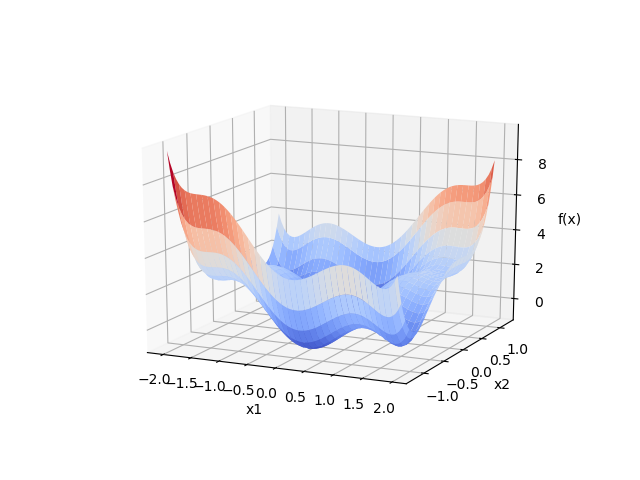

In [3]:
X = np.arange(-2, 2, 0.05)
Y = np.arange(-1.25, 1.25, 0.05)

X, Y = meshgrid(X,Y)
Z = f(X,Y)

fig = plt.figure();
ax = fig.gca(projection='3d');
ax.plot_surface(X, Y, Z, rstride=2, cstride=2, cmap=mpl.cm.coolwarm,
               linewidth=1, antialiased=True)
ax.set_xlabel('x1');
ax.set_ylabel('x2');
ax.set_zlabel('f(x)');

Podemos ver que a função varia seu valor entre mais ou menos $[-1,10]$ e possui 4 partes baixas, sendo 2 maiores por volta de $x_{1} = 0$, formando uma imagem parecida com um $8$, e as duas menores por volta de $[x_{1},x_{2}] = [1.75,-0.75]$ e $[x_{1},x_{2}] = [-1.75,0.75]$.

Devemos então focar nas depressões existentes no $8$ escolhendo nosso $x^{(0)}$ em uma posição próxima.

O centro do $8$ presente na função é exatamente o ponto $[0,0]$ onde $f([0,0]) = 0$.

## Calculando Gradiente ($\bigtriangledown f$) e Matrix Heissiana ($H$) de $f$

$\bigtriangledown f(x) = \begin{bmatrix}
    8x_{1} - 8.4x_{1}^3 + 2x_{1}^5 + x_{2} \\
    x_{1} - 8x_{2} + 16x_{2}^3
\end{bmatrix}$

$H(x) = \begin{bmatrix}
    8 - 25.2x_{1}^2 + 10x_{1}^4 & 1 \\
    1 & -8 + 48x_{2}^2
\end{bmatrix}$

In [4]:
def D(x,y): return np.array([8*x-8.4*(x**3) + 2*(x**5) + y, x - 8*y + 16*(y**3)]);

In [5]:
def H(xl,yl): return np.matrix([
    [8 - 25.2*(x**2) + 10*(x**4), 1],
    [1, -8 + 48*(y**2)]]);


### A escolha do $x^{(0)}$

Como falado anteriormente o mínimo que buscamos está nos circulos do $8$, não vamos escolher um ponto tão no centro da depressão para podermos visualizar as iterações do método.

Sabendo que o centro do $8$ é o ponto $x=[0,0]$, e  $f(x)=0$ e $\bigtriangledown f(x)= [0,0]$, não podemos usar $[0,0]$ como ponto inicial em métodos baseados no gradiente, pois se for feito, visto que $x^{(k+1)} = x^{(k)} + \alpha d$ onde <font color='red'>$d = -\bigtriangledown f(x^{(k)})$ (isso já é usando o método de Gradiente Descendente, talvez tenha que explicar melhor)</font>, a expressão $\alpha d$ será igual à $0$ e $x^{(k+1)} = x^{(k)}$. Dessa forma o método ficará preso em um ponto e não encontrará o mínimo.

Vamos utilizar como $x^{(0)}$ então o ponto $[0.4,0.4]$.

<IPython.core.display.Javascript object>


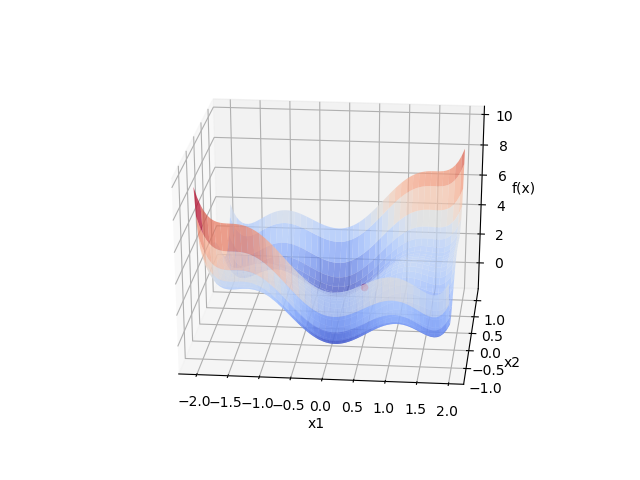

In [6]:
fig = plt.figure();
ax = fig.gca(projection='3d');

x0 = [0.4,0.4];
ax.plot_surface(X, Y, Z, rstride=2, cstride=2, cmap=mpl.cm.coolwarm,
               linewidth=0.4, antialiased=True, alpha=0.7)
ax.scatter(x0[0],x0[1],f(*x0), c='r', marker='o');
ax.set_xlabel('x1');
ax.set_ylabel('x2');
ax.set_zlabel('f(x)');

### Minimizando usando Gradient Directions

Vamos utilizar a técnica de Gradiente directions para encontrar os mínimos globais.

Sabendo da fórmula $x^{(k+1)} = x^{(k)} + \alpha d$, neste método o $d$ é calculado como sendo $d = -\bigtriangledown f(x^{(k)})$, pois $\bigtriangledown f(x^{(k)})$ é um vetor que aponta para direção onde a função cresce a partir do ponto $x^{(k)}$, logo, se queremos encontrar o mínimo iremos para posição oposta.

Esse método converge se $d^{(k)} \cdot \bigtriangledown f(x^{(k)}) < 0$ ou se $\bigtriangledown f(x^{(k)}) = 0$, então $d^{(k)} = 0$

<font color="red">COMPLETAR</font>

In [7]:
from methods import Methods

methods = Methods();

x0 = np.array([0.4,0.4]);

print("\n########################")
xmin, x_inter, n_iter = methods.gradient(f=f, p=D, x0=x0, a=0.17, max_iter=100);
print("\n")
print("xmin\t", xmin)
print("f(x)\t", f(*xmin))
print("n_iter\t", n_iter)

print("\n########################")
xmin, x_inter, n_iter = methods.gradient(f=f, p=D, x0=x0, a=0.01, max_iter=100);
print("\n")
print("xmin:\t", xmin)
print("f(x):\t", f(*xmin))
print("n_iter:\t", n_iter)

print("\n########################")
xmin, x_inter, n_iter = methods.gradient(f=f, p=D, x0=x0, a=0.02, max_iter=100);
print("\n")
print("xmin:\t", xmin)
print("f(x):\t", f(*xmin))
print("n_iter:\t", n_iter)

print("\n########################")
xmin, x_inter, n_iter = methods.gradient(f=f, p=D, x0=x0, a=0.07, max_iter=100);
print("\n")
print("xmin:\t", xmin)
print("f(x):\t", f(*xmin))
print("n_iter:\t", n_iter)

print("\n########################")
xmin, x_inter, n_iter = methods.gradient(f=f, p=D, x0=x0, a=0.1, max_iter=100);
print("\n")
print("xmin:\t", xmin)
print("f(x):\t", f(*xmin))
print("n_iter:\t", n_iter)

x0 = [-0.4, -0.4]
print("\n########################")
xmin, x_inter, n_iter = methods.gradient(f=f, p=D, x0=x0, a=0.07, max_iter=100);
print("\n")
print("xmin:\t", xmin)
print("f(x):\t", f(*xmin))
print("n_iter:\t", n_iter)


########################
x0:		 [ 0.4  0.4]
alpha:		 0.17
tol:		 0.0001
max_inter:	 100


xmin	 [-0.07737271  0.73696843]
f(x)	 -1.02571210094
n_iter	 2

########################
x0:		 [ 0.4  0.4]
alpha:		 0.01
tol:		 0.0001
max_inter:	 100


xmin:	 [-0.07787938  0.71103191]
f(x):	 -1.03106717199
n_iter:	 48

########################
x0:		 [ 0.4  0.4]
alpha:		 0.02
tol:		 0.0001
max_inter:	 100


xmin:	 [-0.08248382  0.71174595]
f(x):	 -1.03141699728
n_iter:	 26

########################
x0:		 [ 0.4  0.4]
alpha:		 0.07
tol:		 0.0001
max_inter:	 100


xmin:	 [-0.08848672  0.71250042]
f(x):	 -1.03162130277
n_iter:	 8

########################
x0:		 [ 0.4  0.4]
alpha:		 0.1
tol:		 0.0001
max_inter:	 100


xmin:	 [-0.08939148  0.71527001]
f(x):	 -1.03157034146
n_iter:	 6

########################
x0:		 [-0.4, -0.4]
alpha:		 0.07
tol:		 0.0001
max_inter:	 100


xmin:	 [ 0.08848672 -0.71250042]
f(x):	 -1.03162130277
n_iter:	 8


Escolhendo $x^{(0)} = [0.4,0.4]$ e uma tolerância de $0.0001$ variando o valor de $\alpha$, temos:

- Usando $\alpha=0.17$ encontramos com 2 iterações o valor $x_{min}=[-0.0773, 0.7369]$ com $f(x_{min})=-1.0257$.
- Usando $\alpha=0.01$ encontramos com 48 iterações o valor $x_{min}=[-0.0778, 0.7110]$ com $f(x_{min})=-1.0310$.
- Usando $\alpha=0.02$ encontramos com 26 iterações o valor $x_{min}=[-0.0824, 0.7117]$ com $f(x_{min})=-1.0314$.
- Usando $\alpha=0.07$ encontramos com 8 iterações o valor $x_{min}=[-0.0884, 0.7125]$ com $f(x_{min})=-1.0316$.
- Usando $\alpha=0.1$ encontramos com 6 iterações o valor $x_{min}=[-0.0893, 0.7152]$ com $f(x_{min})=-1.0315$.

Mudando o $x^{(0)}$ agora para $[-0.4,-0.4]$ a fim de encontrar o outro mínimo global, e usando $\alpha = 0.07$ e a mesma tolerância, temos:

 - Com 8 iterações encontramos $x_{min}^{'}=[0.0884, -0.7125]$ com $f(x_{min}^{'})=-1.0316$. Onde $x_{min}^{'} = -x_{min}$ (com $x_{min}$ encontrado com $\alpha=0.07$), como era esperado, já que a função é simétrica.

#### Trajetória do método
Para podermos observar melhor a trajetória do ponto vamos usar o ponto $x^{(0)} = [1,0]$, pois assim o algoritmo faz um pouco mais de passos e um pouco maiores, melhores para visualizar.

x0:		 [1, 0]
alpha:		 0.07
tol:		 0.0001
max_inter:	 100


xmin:	 [ 0.0923068  -0.71294173]
f(x):	 -1.03160481626
n_iter:	 10


<IPython.core.display.Javascript object>


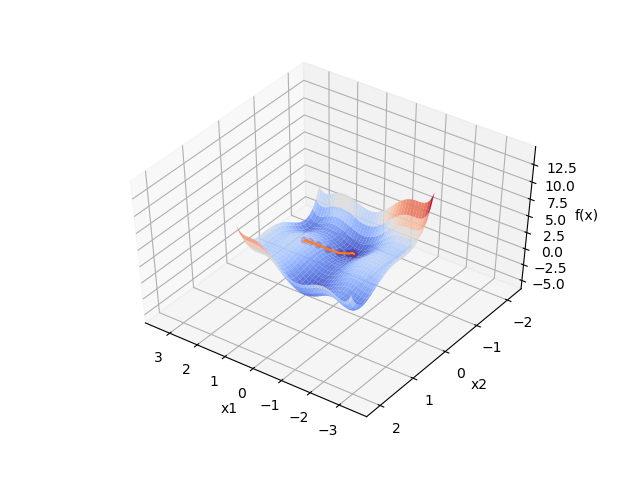

In [8]:
x0 = [1, 0]
xmin, x_inter, n_iter = methods.gradient(f=f, p=D, x0=x0, a=0.07, max_iter=100);
print("\n")
print("xmin:\t", xmin)
print("f(x):\t", f(*xmin))
print("n_iter:\t", n_iter)

Xint = []
Yint = []
Zint = []
for i in range(len(x_inter)):
    Xint.append(x_inter[i][0]);
    Yint.append(x_inter[i][1]);
    Zint.append(f(*x_inter[i]))

transparency = 0.9 # 0 = transparent, 1 = opaque

fig = plt.figure();
ax = fig.gca(projection='3d');
ax.plot_surface(X, Y, Z, rstride=2, cstride=2, cmap=mpl.cm.coolwarm,
               linewidth=0, antialiased=True, alpha=transparency)
ax.plot(Xint, Yint, Zint)
ax.scatter(Xint, Yint, Zint, c='r', marker='o', alpha=1);
ax.set_xlabel('x1');
ax.set_ylabel('x2');
ax.set_zlabel('f(x)');

#### Curiosidade

Usando $x^{(0)}=[-1,0.931]$ e $\alpha = 0.07$ encontramos um ponto $x^{(k)} = [-0.0006, -0.0043]$ onde $d^{k} \cdot \bigtriangledown f(x^{(k)}) \approx 0$, então o algoritmo para. Essa é a característica de um local plano na função, parecido com o local do mínimo, isso gera uma indecisão no algoritmo.

x0:		 [-1.0, -0.0931]
alpha:		 0.07
tol:		 0.0001
max_inter:	 100


xmin:	 [-0.00069417 -0.0043062 ]
f(x):	 -6.92554095673e-05
n_iter:	 11


<IPython.core.display.Javascript object>


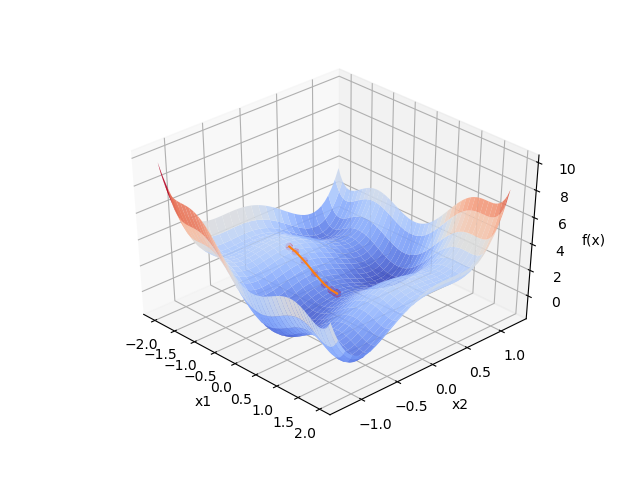

In [9]:
x0 = [-1.0, -0.0931]
xmin, x_inter, n_iter = methods.gradient(f=f, p=D, x0=x0, a=0.07, max_iter=100);
print("\n")
print("xmin:\t", xmin)
print("f(x):\t", f(*xmin))
print("n_iter:\t", n_iter)

Xint = []
Yint = []
Zint = []
for i in range(len(x_inter)):
    Xint.append(x_inter[i][0]);
    Yint.append(x_inter[i][1]);
    Zint.append(f(*x_inter[i]))

transparency = 0.9 # 0 = transparent, 1 = opaque

fig = plt.figure();
ax = fig.gca(projection='3d');
ax.plot_surface(X, Y, Z, rstride=2, cstride=2, cmap=mpl.cm.coolwarm,
               linewidth=0, antialiased=True, alpha=transparency)
ax.plot(Xint, Yint, Zint)
ax.scatter(Xint, Yint, Zint, c='r', marker='o', alpha=1);
ax.set_xlabel('x1');
ax.set_ylabel('x2');
ax.set_zlabel('f(x)');